# Домашнее задание

In [1]:
import pandas as pd
df1 = pd.read_csv('olimpic_medals.csv')

In [2]:
df1

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


### 1. Сколько медалей выиграл Jesse Owens в 1936?

In [3]:
Jesse_O = df1[(df1['Athlete']=='OWENS, Jesse') & (df1['Edition']==1936)]
Jesse_O

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
6427,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,100m,M,Gold
6439,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,200m,M,Gold
6456,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,4x100m relay,M,Gold
6523,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,long jump,M,Gold


In [4]:
f'Jesse Owens выйграл {len(Jesse_O)} медали'

'Jesse Owens выйграл 4 медали'

### 2. Какая страна выйграла большинство золотых медалей мужчинами в бадминтоне?

In [5]:
df2 = df1[(df1['Discipline']=='Badminton') & (df1['Gender']=='Men') & (df1['Medal']=='Gold')]
df2 = df2.groupby('NOC').count()
df2 = df2.sort_values(by=['Medal'], ascending=False)

In [6]:
df2[df2['Medal']==max(df2['Medal'])]['Medal']

NOC
INA    8
Name: Medal, dtype: int64

### 3. Какие три страны выйграли большинство медалей в последние годы (с 1984 по 2008)?

In [7]:
df3 = df1[(df1['Edition']<=2008) & (df1['Edition']>=1984)]
df3 = df3.groupby('NOC').count()
df3 = df3.sort_values(by=['Medal'], ascending=False).head(3)

In [8]:
df3['Medal']

NOC
USA    1837
AUS     762
GER     691
Name: Medal, dtype: int64

### 4. Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выйгрыша. Покажите город в котором проходила олимпиала, год, имя атлета и страну за которую он выступал.

In [9]:
df4 = df1[(df1['Gender']=='Men') & (df1['Medal']=='Gold') & (df1['Event']=='100m')]
df4 = df4.sort_values(by=['Edition'], ascending=False)
df4 = df4[['City','Edition','Athlete','NOC']]
df4

,City,Edition,Athlete,NOC
27552,Beijing,2008,"BOLT, Usain",JAM
25539,Athens,2004,"GATLIN, Justin",USA
23521,Sydney,2000,"GREENE, Maurice",USA
21598,Atlanta,1996,"BAILEY, Donovan",CAN
19859,Barcelona,1992,"CHRISTIE, Linford",GBR
18284,Seoul,1988,"LEWIS, Carl",USA
16794,Los Angeles,1984,"LEWIS, Carl",USA
15374,Moscow,1980,"WELLS, Allan",GBR
14069,Montreal,1976,"CRAWFORD, Hasely",TRI
12902,Munich,1972,"BORZOV, Valery",URS


### 5. Как много медалей было выйграно мужчинами и женщинами в истории олимпиады. Как много золотых, серебрянных и бронзовых медалей было выйграно каждым полом?

In [10]:
df5 = df1.groupby(['Gender', 'Medal'])['Event'].count()
df5

Gender  Medal 
Men     Bronze    7175
        Gold      7365
        Silver    7181
Women   Bronze    2514
        Gold      2485
        Silver    2496
Name: Event, dtype: int64

### 6. Используя groupby(), постройте график числа всех медалей выйгранных на каждой олимпиаде.

In [11]:
df6 = df1.groupby(['Edition'])['Medal'].count()

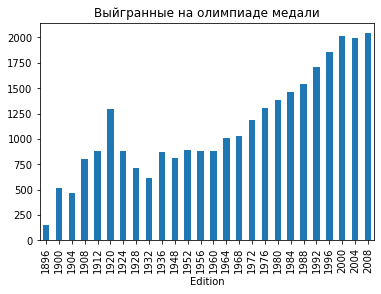

In [34]:
df6.plot(kind='bar',
         title = 'Выйгранные на олимпиаде медали')

### 7. Создайте список показывающий число всех медалей выйгранных каждой страной в течение всей истории олимпийских игр. Для каждой страны, необходимо показать год первой и последней заработанной медали.

In [13]:
df7 = df1.sort_values(by='Edition', ascending=False)

In [14]:
df7_first = df7.drop_duplicates(subset='NOC', keep='first')[['NOC', 'Edition']]
df7_first['Edition'] = df7_first['Edition'].map(lambda x: str(x)+' last medal')


df7_last = df7.drop_duplicates(subset='NOC', keep='last')[['NOC', 'Edition']]
df7_last['Edition'] = df7_last['Edition'].map(lambda x: str(x)+' first medal')

df7 = pd.concat([df7_first,df7_last])

In [15]:
df7 = df7.groupby(['NOC']).agg(', '.join).reset_index()

In [16]:
Num_medals = df1.groupby('NOC').count()
Num_medals = pd.DataFrame(Num_medals.to_records())
Num_medals = Num_medals[['NOC', 'Medal']]

In [17]:
df7 = df7.merge(Num_medals, on='NOC')

In [18]:
df7

,NOC,Edition,Medal
0,AFG,"2008 last medal, 2008 first medal",1
1,AHO,"1988 last medal, 1988 first medal",1
2,ALG,"2008 last medal, 1984 first medal",14
3,ANZ,"1912 last medal, 1908 first medal",29
4,ARG,"2008 last medal, 1924 first medal",239
...,...,...,...
133,VIE,"2008 last medal, 2000 first medal",2
134,YUG,"2000 last medal, 1924 first medal",435
135,ZAM,"1996 last medal, 1984 first medal",2
136,ZIM,"2008 last medal, 1980 first medal",23


### 8. Атлеты выйгравшие медали в Beijing на дистанции 100m или 200m

In [19]:
df8 = df1[(df1['Event']=='100m') | (df1['Event']=='200m')]
df8 = df8[df8['City']=='Beijing']['Athlete']

In [20]:
df8

27551                 DIX, Walter
27552                 BOLT, Usain
27553           THOMPSON, Richard
27554          FRASER, Shelly-ann
27555            SIMPSON, Sherone
27556             STEWART, Kerron
27569                 DIX, Walter
27570                 BOLT, Usain
27571             CRAWFORD, Shawn
27572             STEWART, Kerron
27573    CAMPBELL-BROWN, Veronica
27574              FELIX, Allyson
Name: Athlete, dtype: object

### 9. Постройте график числа золотых медалей выйгранных США мужчинами и женщинами в атлетике.

In [21]:
df9 = df1[(df1['NOC']=='USA') & (df1['Medal']=='Gold')]

In [22]:
df9 = df9.groupby('Gender')['Medal'].count()

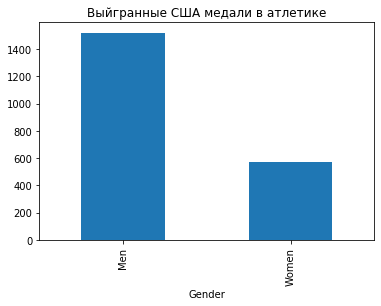

In [23]:
df9.plot(kind='bar',
         title = 'Выйгранные США медали в атлетике')

### 10. Постройте график 5 атлетов которые выйграли большинство золотых медалей.

In [24]:
df10 = df1.groupby('Athlete').count()
df10 = df10.sort_values(by='Medal', ascending=False)
df10 = df10.head(5)

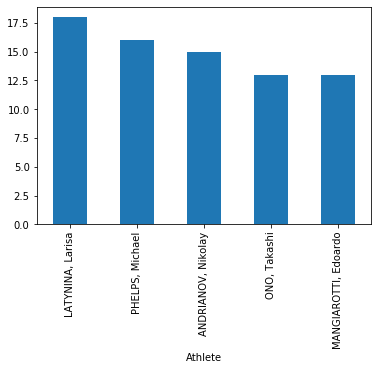

In [25]:
df10['Medal'].plot(kind='bar')

### 11. Покажите суммарное количество медалей выйгранных странами в последних олимпийских играх.

In [26]:
Year = df1['Edition'].unique()
Year.sort()

In [27]:
Year = Year[-5::]

In [28]:
df11 = df1[df1['Edition'].isin(Year)]

In [29]:
df11.groupby('NOC')['Medal'].count()

NOC
AFG      1
ALG     12
ARG    140
ARM      9
AUS    678
      ... 
VEN      3
VIE      2
YUG     52
ZAM      1
ZIM      7
Name: Medal, Length: 116, dtype: int64

In [30]:
len(df11)

9619

### 12. Постройте таблицу в которой по годам всех олимпиад покажите топовых атлетов США(1 атлет на год) по общему количеству медалей. Включите дисциплину атлета.

In [31]:
df12 = df1[df1['NOC']=='USA']
df12 = df12[['Edition','Discipline','Athlete']]
df12 = df12.groupby(df12.columns.tolist(),as_index=False).size()


In [32]:
df12 = pd.DataFrame(df12)
df12 = pd.DataFrame(df12.to_records())

In [33]:
df12 = df12.rename(columns={'0': 'Num_medals'})
df12 = df12.sort_values(by=['Edition','Num_medals'], ascending=False)
df12 = df12.drop_duplicates(subset='Edition', keep='first')
df12

,Edition,Discipline,Athlete,Num_medals
3492,2008,Swimming,"PHELPS, Michael",8
3260,2004,Swimming,"PHELPS, Michael",8
3055,2000,Swimming,"TORRES, Dara",5
2821,1996,Swimming,"HALL, Gary Jr.",4
2458,1992,Artistic G.,"MILLER, Shannon",5
2397,1988,Swimming,"BIONDI, Matthew",7
2025,1984,Artistic G.,"RETTON, Mary-Lou",5
1981,1976,Swimming,"BABASHOFF, Shirley Farber",5
1862,1972,Swimming,"SPITZ, Mark",7
1729,1968,Swimming,"HENNE, Jane Margo",4
